In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
# ignore I / W messages.

2023-11-29 00:46:08.394804: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 00:46:08.453008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 00:46:08.830313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 00:46:08.832223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 00:46:09.958430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
csv_file= pd.read_csv('dataset/A_Z Handwritten Data.csv').astype('float32')
dataset = pd.DataFrame(csv_file)

x = dataset.drop('0', axis = 1)
y = dataset['0']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [3]:
print('-- phase 2: Preparing dataset --')

x = dataset.drop('0', axis = 1)
y = dataset['0']

print(f'x: {x.shape}')
print(f'y: {y.shape}')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

y_test = np.reshape(y_test.values, (y_test.shape[0], 1))

print(f'x_test: {x_test}, type: {type(x_test)}, shape: {x_test.shape}')
print(f'y_test: {y_test}, type: {type(y_test)}, shape: {y_test.shape}')

-- phase 2: Preparing dataset --
x: (372450, 784)
y: (372450,)
x_test:         0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
312722  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
305859  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
272901  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17978   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
14143   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
53363   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
38473   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
259553  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
265488  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
77653   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [4]:
print('loading the model')
modelLoad = tf.keras.models.load_model('model/main.keras')

test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print(f'lock and loaded! {test.shape}')

loading the model
lock and loaded! (74490, 28, 28)


2023-11-29 00:46:32.118051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1/1 [==============================] - 0s 18ms/step


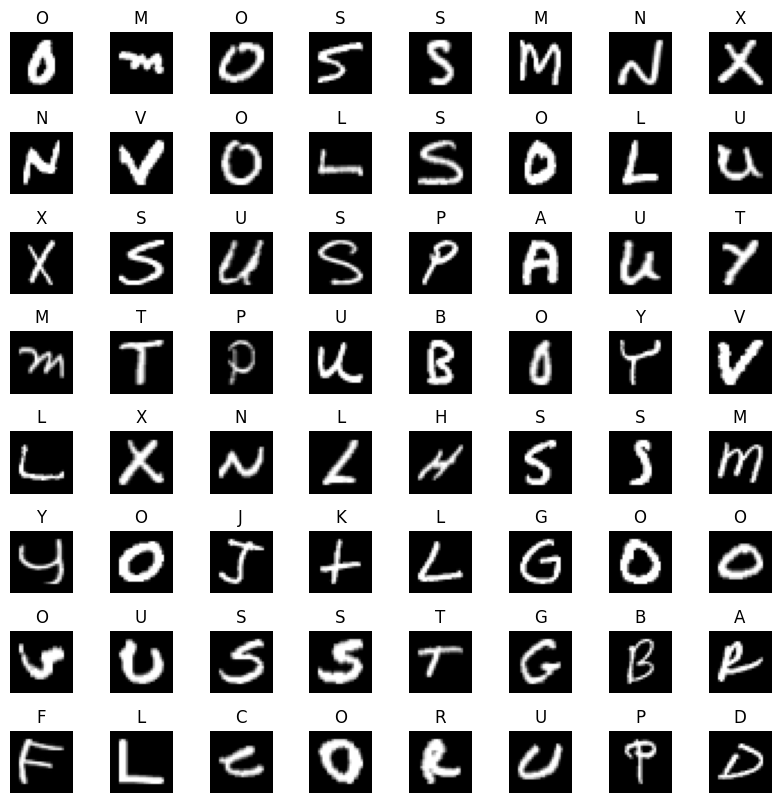

In [5]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

m,n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)


# Labels are Predictions from main.keras
for i,ax in enumerate(axes.flat):

    i = np.random.randint(m)

    ax.imshow(test[i], cmap='gray')
    
    predict = modelLoad.predict(test[i].reshape(1,784))
    
    ax.set_title(alphabets[np.argmax(predict)])
    ax.set_axis_off()
    